In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from astropy.coordinates import SkyCoord
import astropy.units as u

In [4]:
df= pd.read_csv("star_classification.csv")
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [5]:
cols = df.columns.tolist()
store_col=cols[-1]
cols[-1]=cols[13]
cols[13]=store_col
df = df[cols].copy(deep=True)
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,fiber_ID,redshift,plate,MJD,class
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,171,0.634794,5812,56354,GALAXY
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,427,0.779136,10445,58158,GALAXY
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,299,0.644195,4576,55592,GALAXY
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,775,0.932346,9149,58039,GALAXY
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,842,0.116123,6121,56187,GALAXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,438,0.000000,9374,57749,GALAXY
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,866,0.404895,7626,56934,GALAXY
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,74,0.143366,2764,54535,GALAXY
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,470,0.455040,6751,56368,GALAXY


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
obj_ID,100000.0,1.237665e+18,8.438560e+12,1.237646e+18,1.237659e+18,1.237663e+18,1.237668e+18,1.237681e+18
alpha,100000.0,1.776291e+02,9.650224e+01,5.527828e-03,1.275182e+02,1.809007e+02,2.338950e+02,3.599998e+02
delta,100000.0,2.413530e+01,1.964467e+01,-1.878533e+01,5.146771e+00,2.364592e+01,3.990155e+01,8.300052e+01
u,100000.0,2.198047e+01,3.176929e+01,-9.999000e+03,2.035235e+01,2.217914e+01,2.368744e+01,3.278139e+01
g,100000.0,2.053139e+01,3.175029e+01,-9.999000e+03,1.896523e+01,2.109983e+01,2.212377e+01,3.160224e+01
r,100000.0,1.964576e+01,1.854760e+00,9.822070e+00,1.813583e+01,2.012529e+01,2.104478e+01,2.957186e+01
i,100000.0,1.908485e+01,1.757895e+00,9.469903e+00,1.773228e+01,1.940514e+01,2.039650e+01,3.214147e+01
z,100000.0,1.866881e+01,3.172815e+01,-9.999000e+03,1.746068e+01,1.900460e+01,1.992112e+01,2.938374e+01
run_ID,100000.0,4.481366e+03,1.964765e+03,1.090000e+02,3.187000e+03,4.188000e+03,5.326000e+03,8.162000e+03
rerun_ID,100000.0,3.010000e+02,0.000000e+00,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02


The classes are: ['GALAXY' 'QSO' 'STAR']
Original dataset shape is:
GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64


<AxesSubplot:xlabel='class', ylabel='count'>

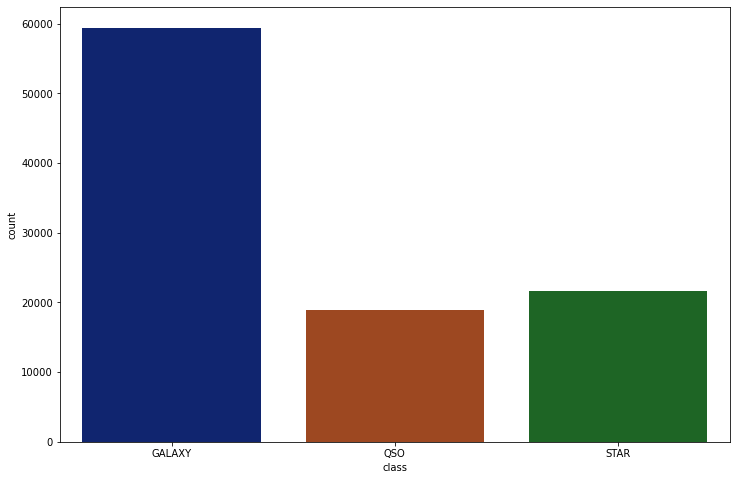

In [7]:
print('The classes are:', df['class'].unique())
print('Original dataset shape is:\n%s' % df.loc[:,'class'].value_counts())
plt.figure(figsize=(12,8))
sns.countplot(x = df['class'],palette = 'dark')

Convert the classes from strung to numbers

Galaxy = 0

Star = 1

Quasar =2

In [6]:
df["class"]=[0 if i == "GALAXY" else 1 if i == "STAR" else 2 for i in df["class"]]

In [7]:
galaxy = df[df['class']==0]
star = df[df['class']==1]
qso = df[df['class']==2]

# 1- celestial coordinate representation

---



In [9]:
ra1=galaxy['alpha']
dec1=galaxy['delta']
coords1 = SkyCoord(ra=ra1*u.degree, dec=dec1*u.degree, frame='icrs')

ra2=star['alpha']
dec2=star['delta']
coords2 = SkyCoord(ra=ra2*u.degree, dec=dec2*u.degree, frame='icrs')

ra3=qso['alpha']
dec3=qso['delta']
coords3 = SkyCoord(ra=ra3*u.degree, dec=dec3*u.degree, frame='icrs')

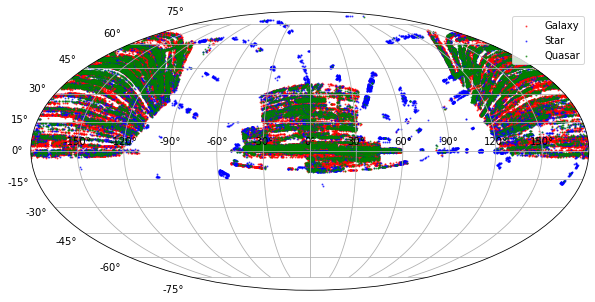

In [10]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='mollweide')
ax.scatter(coords1.ra.wrap_at(180*u.degree).radian, coords1.dec.radian, s=1,c='r',alpha=0.6,label='Galaxy')
ax.scatter(coords2.ra.wrap_at(180*u.degree).radian, coords2.dec.radian,s=1,c='b',alpha=0.6,label='Star')
ax.scatter(coords3.ra.wrap_at(180*u.degree).radian, coords3.dec.radian, s=1,c='g',alpha=0.6,label='Quasar')

#change the marker size manually for the legend
lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=10)
#lgnd.legend_handles[0]._sizes = [30]
#lgnd.legend_handles[1]._sizes = [30]
#lgnd.legend_handles[2]._sizes = [30]
ax.grid(True)
plt.show()

Drop Categorical features and coordinates

In [8]:
df2=df.copy(deep=True)
df2=df2.drop(['spec_obj_ID','alpha','delta','run_ID','rerun_ID','cam_col','field_ID','fiber_ID','plate','MJD'], axis = 1)
df2.sample(frac=1)

,obj_ID,u,g,r,i,z,redshift,class
122,1.237679e+18,24.70554,22.40585,20.81726,19.85176,19.57173,0.487070,GALAXY
67641,1.237655e+18,24.71911,20.66083,18.87859,18.17288,17.87914,0.392983,GALAXY
93537,1.237670e+18,22.24497,21.39449,21.26231,20.78043,20.90019,1.584604,QSO
99163,1.237659e+18,20.19905,18.31968,17.79920,17.48406,17.40564,0.102034,GALAXY
8185,1.237657e+18,24.60439,23.17631,22.77506,22.36519,22.51373,0.756177,GALAXY
...,...,...,...,...,...,...,...,...
64063,1.237668e+18,22.51874,20.81075,19.08295,18.44116,18.05490,0.338132,GALAXY
53175,1.237661e+18,24.84764,22.58610,21.06126,20.04959,19.36045,0.000153,STAR
61846,1.237668e+18,23.53001,21.99218,20.48153,19.53839,19.07758,0.513883,GALAXY
53417,1.237664e+18,23.31226,21.12102,19.18586,18.50933,18.05521,0.343587,GALAXY


In [9]:
corr = df2.corr(method='pearson')
corr

,obj_ID,u,g,r,i,z,redshift
obj_ID,1.000000,0.015310,0.015710,0.153891,0.147670,0.013811,0.065400
u,0.015310,1.000000,0.999311,0.054149,0.045730,0.998093,0.014309
g,0.015710,0.999311,1.000000,0.062387,0.056271,0.999161,0.022954
r,0.153891,0.054149,0.062387,1.000000,0.962868,0.053677,0.433241
i,0.147670,0.045730,0.056271,0.962868,1.000000,0.055994,0.492383
z,0.013811,0.998093,0.999161,0.053677,0.055994,1.000000,0.030380
redshift,0.065400,0.014309,0.022954,0.433241,0.492383,0.030380,1.000000


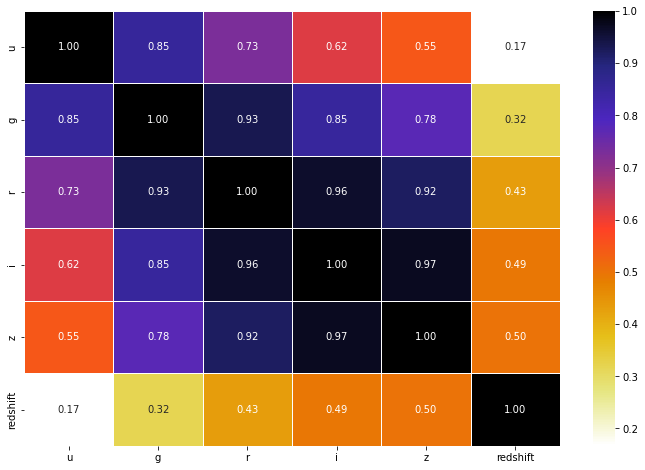

In [10]:
df2=df2.drop(df2['g'].idxmin())
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(df2.drop(['obj_ID'], axis = 1).corr(method='pearson'), cmap=plt.cm.CMRmap_r, annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
plt.show()

In [11]:
df3=df2.copy(deep=True)
# Create correlation matrix
### corr_matrix = df3.corr().abs()
# Select upper triangle of correlation matrix
### upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
# Find index of feature columns with correlation greater than 0.95
### to_drop = [column for column in upper.columns if any(upper[column] >= 0.95)]
df3=df3.drop('i', axis=1, inplace=True)
df3

In [12]:
def remove_highly_correlated_features(df, threshold):
    # Create correlation matrix
    corr_matrix = df.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find index of feature columns with correlation greater than threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

    # Drop features 
    df_dropped = df.drop(df[to_drop], axis=1)
    
    return df_dropped

df3 = remove_highly_correlated_features(df2, 0.95)

/var/folders/xc/wwmv09fx49ldb0xqhs8v6zsm0000gn/T/ipykernel_76268/1311157899.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [13]:
df3

,obj_ID,u,g,r,redshift,class
0,1.237661e+18,23.87882,22.27530,20.39501,0.634794,GALAXY
1,1.237665e+18,24.77759,22.83188,22.58444,0.779136,GALAXY
2,1.237661e+18,25.26307,22.66389,20.60976,0.644195,GALAXY
3,1.237663e+18,22.13682,23.77656,21.61162,0.932346,GALAXY
4,1.237680e+18,19.43718,17.58028,16.49747,0.116123,GALAXY
...,...,...,...,...,...,...
99995,1.237679e+18,22.16759,22.97586,21.90404,0.000000,GALAXY
99996,1.237679e+18,22.69118,22.38628,20.45003,0.404895,GALAXY
99997,1.237668e+18,21.16916,19.26997,18.20428,0.143366,GALAXY
99998,1.237661e+18,25.35039,21.63757,19.91386,0.455040,GALAXY


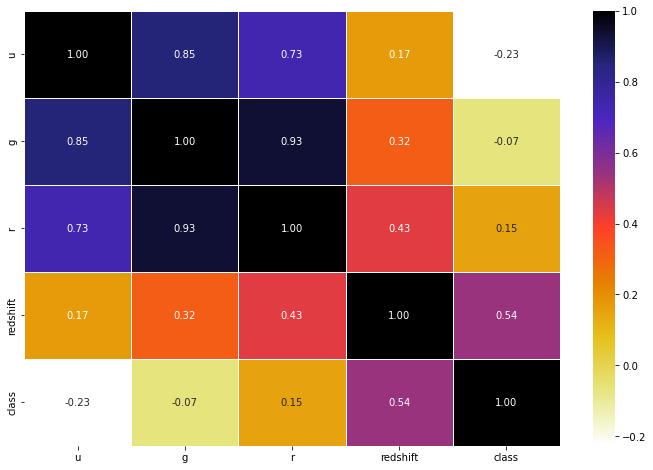

In [14]:
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(df3.drop(['obj_ID'], axis = 1).corr(method='pearson'), cmap=plt.cm.CMRmap_r, annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
plt.show()

# Split the dataframe into a Feature Matrix X and a class vector y

In [14]:
X = df3.drop(['obj_ID','class'], axis = 1)
y = df3.loc[:,'class'].values

# Data Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train / Test Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 123,stratify=y)

<AxesSubplot:ylabel='count'>

<Figure size 720x576 with 0 Axes>

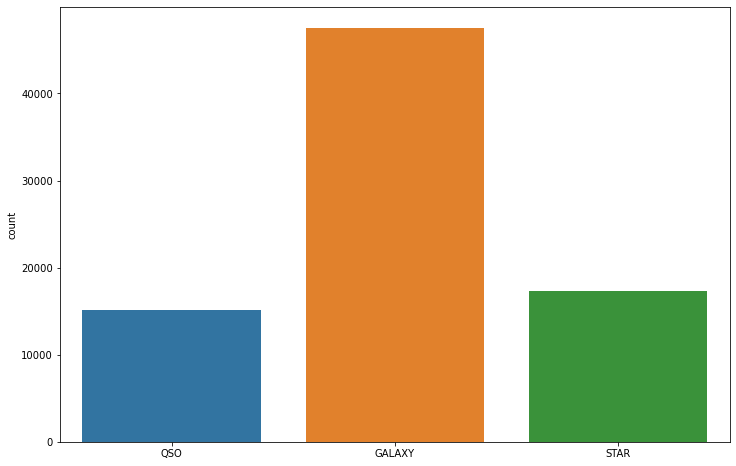

In [26]:
ordered_categories = ['GALAXY', 'QSO' , 'STAR']  

# convert the 'class' column to a categorical type with specified order
df['class'] = df['class'].astype(pd.CategoricalDtype(ordered_categories, ordered=True))

plt.figure(figsize=(10,8))
plt.figure(figsize=(12,8))
# sns.countplot(x = y_train,palette = 'dark')
df3['class'] = df3['class'].astype(pd.CategoricalDtype(ordered_categories, ordered=True))

sns.countplot(x=y_train, data=df3)

# Dealing with imbalanced with SMOTE (Synthetic Minority Oversampling TEchnique)

In [19]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [20]:
sm = SMOTE(random_state=345)
print('Original dataset shape %s' % Counter(y))

X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_smote))

Original dataset shape Counter({0: 59445, 1: 21593, 2: 18961})
Resampled dataset shape Counter({0: 47556, 1: 47556, 2: 47556})


<AxesSubplot:ylabel='count'>

<Figure size 720x576 with 0 Axes>

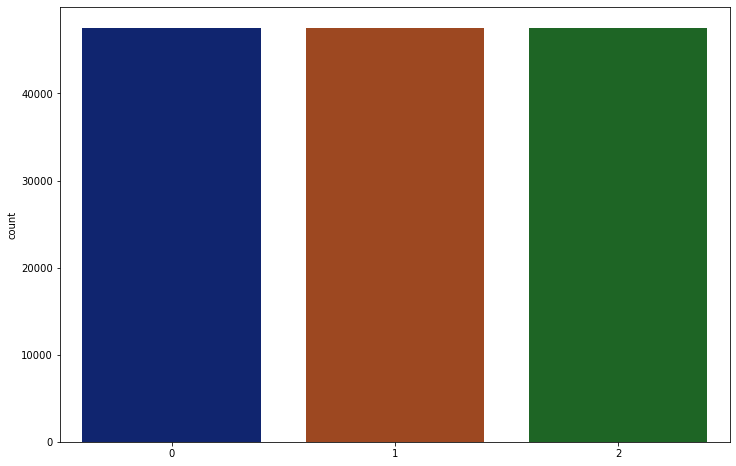

In [21]:
plt.figure(figsize=(10,8))
plt.figure(figsize=(12,8))
sns.countplot(x = y_train_smote,palette = 'dark')

# Data Scaling 2

I noticed that the SMOTE algorithm does not conserve the mean and the std of the sample. So, I will do a second scaling.

In [22]:
X_train_smote = scaler.fit_transform(X_train_smote)

# Classification

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold,GridSearchCV
from sklearn.metrics import accuracy_score

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.style import set_palette

## 1- SVM

### 1.a/ Define the SVM model and the grid of parameters

In [27]:
# Define the parameter grid for the SVM classifier
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'degree': [2, 3, 4]}

# Create a SVM classifier object
svc = svm.SVC()

# Create a grid search object with cross-validation
grid_search_1 = GridSearchCV(svc, param_grid, cv=3,scoring='accuracy', verbose=10)

### 1.b/ Select the best SVM model using cross validation

In [38]:
# This section takes 3 hours and 30 minutes to run. 
# It carries out a 3-fold cross validation over the grid search to select the best model.
# The best parameters that it will give are: {'C': 10, 'degree': 2, 'kernel': 'rbf'}
# You can skip it and go to the section: 1.c/ Train the best model on the entire dataset

#___________________________________________________
#start = time.time()
# #Fit the grid search object to the training data
#grid_search_1.fit(X_train_smote, y_train_smote)
#end = time.time()
#dt=end-start


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3; 1/27] START C=0.1, degree=2, kernel=linear.............................
[CV 1/3; 1/27] END C=0.1, degree=2, kernel=linear;, score=0.945 total time= 1.3min
[CV 2/3; 1/27] START C=0.1, degree=2, kernel=linear.............................
[CV 2/3; 1/27] END C=0.1, degree=2, kernel=linear;, score=0.944 total time= 1.3min
[CV 3/3; 1/27] START C=0.1, degree=2, kernel=linear.............................
[CV 3/3; 1/27] END C=0.1, degree=2, kernel=linear;, score=0.948 total time= 1.4min
[CV 1/3; 2/27] START C=0.1, degree=2, kernel=rbf................................
[CV 1/3; 2/27] END .C=0.1, degree=2, kernel=rbf;, score=0.947 total time= 3.4min
[CV 2/3; 2/27] START C=0.1, degree=2, kernel=rbf................................
[CV 2/3; 2/27] END .C=0.1, degree=2, kernel=rbf;, score=0.945 total time= 3.3min
[CV 3/3; 2/27] START C=0.1, degree=2, kernel=rbf................................
[CV 3/3; 2/27] END .C=0.1, degree=2, kerne

[CV 3/3; 17/27] END ..C=1, degree=4, kernel=rbf;, score=0.964 total time= 2.3min
[CV 1/3; 18/27] START C=1, degree=4, kernel=poly................................
[CV 1/3; 18/27] END .C=1, degree=4, kernel=poly;, score=0.871 total time= 4.7min
[CV 2/3; 18/27] START C=1, degree=4, kernel=poly................................
[CV 2/3; 18/27] END .C=1, degree=4, kernel=poly;, score=0.871 total time= 4.7min
[CV 3/3; 18/27] START C=1, degree=4, kernel=poly................................
[CV 3/3; 18/27] END .C=1, degree=4, kernel=poly;, score=0.877 total time= 4.8min
[CV 1/3; 19/27] START C=10, degree=2, kernel=linear.............................
[CV 1/3; 19/27] END C=10, degree=2, kernel=linear;, score=0.953 total time= 1.2min
[CV 2/3; 19/27] START C=10, degree=2, kernel=linear.............................
[CV 2/3; 19/27] END C=10, degree=2, kernel=linear;, score=0.952 total time= 1.2min
[CV 3/3; 19/27] START C=10, degree=2, kernel=linear.............................
[CV 3/3; 19/27] END C=10

In [25]:
# print('delta t =', dt, 'seconds')

In [40]:
# #Print results
#results = grid_search_1.cv_results_
#for mean_score, std_score, params in zip(results['mean_test_score'], results['std_test_score'], results['params']):
#    print(f"Mean test score: {mean_score:.3f} (+/-{std_score:.3f}) for {params}")

Mean test score: 0.946 (+/-0.002) for {'C': 0.1, 'degree': 2, 'kernel': 'linear'}
Mean test score: 0.947 (+/-0.002) for {'C': 0.1, 'degree': 2, 'kernel': 'rbf'}
Mean test score: 0.839 (+/-0.002) for {'C': 0.1, 'degree': 2, 'kernel': 'poly'}
Mean test score: 0.946 (+/-0.002) for {'C': 0.1, 'degree': 3, 'kernel': 'linear'}
Mean test score: 0.947 (+/-0.002) for {'C': 0.1, 'degree': 3, 'kernel': 'rbf'}
Mean test score: 0.903 (+/-0.002) for {'C': 0.1, 'degree': 3, 'kernel': 'poly'}
Mean test score: 0.946 (+/-0.002) for {'C': 0.1, 'degree': 4, 'kernel': 'linear'}
Mean test score: 0.947 (+/-0.002) for {'C': 0.1, 'degree': 4, 'kernel': 'rbf'}
Mean test score: 0.795 (+/-0.002) for {'C': 0.1, 'degree': 4, 'kernel': 'poly'}
Mean test score: 0.952 (+/-0.002) for {'C': 1, 'degree': 2, 'kernel': 'linear'}
Mean test score: 0.962 (+/-0.001) for {'C': 1, 'degree': 2, 'kernel': 'rbf'}
Mean test score: 0.870 (+/-0.002) for {'C': 1, 'degree': 2, 'kernel': 'poly'}
Mean test score: 0.952 (+/-0.002) for {'C'

In [42]:
# #Print the best parameters and score
#print('Best parameters: ', grid_search_1.best_params_)
#print('Best score: ', grid_search_1.best_score_)
# #Access the best model
#best_model_SVM = grid_search_1.best_estimator_

Best parameters:  {'C': 10, 'degree': 2, 'kernel': 'rbf'}
Best score:  0.9685002943897721


### 1.c/ Train the best model on the entire dataset

In [30]:
best_model_SVM = svm.SVC(C=10, degree=2, kernel='rbf')

In [31]:
best_model_SVM.fit(X_train_smote,y_train_smote)

SVC(C=10, degree=2)

In [88]:
# Print the Accuracy
y_pred = best_model_SVM.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred)

0.93975

In [ ]:
# Print the classification report
#y_pred = grid_search_1.predict(X_test)
#print(classification_report(y_test, y_pred))

### 1.d/ Confusion Matrix

/Users/rafidbendimerad/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


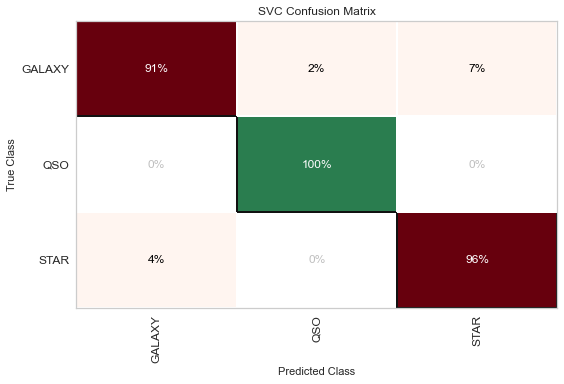

<AxesSubplot:title={'center':'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [166]:
Classes = ['GALAXY','QSO','STAR']
viz = ConfusionMatrix(best_model_SVM,classes=Classes,cmap="Reds",percent=True)
# Fit the visualizer on the training data
#viz.fit(X_train_smote, y_train_smote)
viz.score(X_test, y_test)
viz.show()



### 1.e/ Class Prediction Error

/Users/rafidbendimerad/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


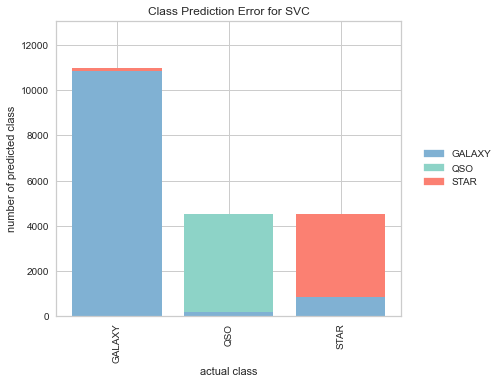

<AxesSubplot:title={'center':'Class Prediction Error for SVC'}, xlabel='actual class', ylabel='number of predicted class'>

In [167]:
visualizer = ClassPredictionError(best_model_SVM, classes=Classes)
set_palette('muted')

#visualizer.fit(X_train_smote, y_train_smote)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Draw visualization

### 1.f/ ROC curves

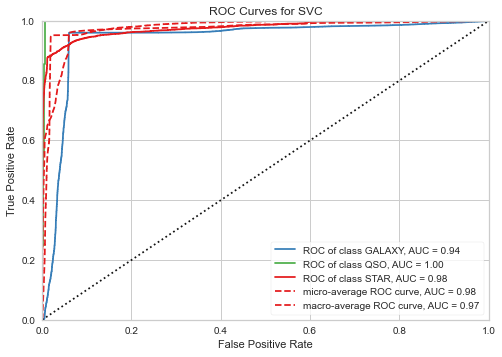

<AxesSubplot:title={'center':'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [36]:
visualizer = ROCAUC(best_model_SVM, classes=Classes)
set_palette('bold')

visualizer.fit(X_train_smote, y_train_smote)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

----

___

## 2- Random Forest

### 2.a/ Define the RF model and the grid of parameters

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
# Define the parameter grid for the RF classifier
param_grid_RF = {'n_estimators': [10, 20, 50],
              'max_depth': [5,10,None],
              'min_samples_split': [2, 5, 10]}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)
# Set up the grid search
grid_search_RF = GridSearchCV(rf, param_grid_RF, cv=3, scoring='accuracy', verbose=10)

### 2.b/ Train the RF models using cross validation¶

In [77]:
start = time.time()
# Fit the grid search object to the training data
grid_search_RF.fit(X_train_smote, y_train_smote)
end = time.time()
dt=end-start


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3; 1/27] START max_depth=5, min_samples_split=2, n_estimators=10..........
[CV 1/3; 1/27] END max_depth=5, min_samples_split=2, n_estimators=10;, score=0.958 total time=   0.8s
[CV 2/3; 1/27] START max_depth=5, min_samples_split=2, n_estimators=10..........
[CV 2/3; 1/27] END max_depth=5, min_samples_split=2, n_estimators=10;, score=0.961 total time=   0.7s
[CV 3/3; 1/27] START max_depth=5, min_samples_split=2, n_estimators=10..........
[CV 3/3; 1/27] END max_depth=5, min_samples_split=2, n_estimators=10;, score=0.965 total time=   0.7s
[CV 1/3; 2/27] START max_depth=5, min_samples_split=2, n_estimators=20..........
[CV 1/3; 2/27] END max_depth=5, min_samples_split=2, n_estimators=20;, score=0.963 total time=   1.3s
[CV 2/3; 2/27] START max_depth=5, min_samples_split=2, n_estimators=20..........
[CV 2/3; 2/27] END max_depth=5, min_samples_split=2, n_estimators=20;, score=0.961 total time=   1.4s
[CV 3/3; 2/27] START max

[CV 3/3; 15/27] END max_depth=10, min_samples_split=5, n_estimators=50;, score=0.976 total time=   6.0s
[CV 1/3; 16/27] START max_depth=10, min_samples_split=10, n_estimators=10.......
[CV 1/3; 16/27] END max_depth=10, min_samples_split=10, n_estimators=10;, score=0.973 total time=   1.2s
[CV 2/3; 16/27] START max_depth=10, min_samples_split=10, n_estimators=10.......
[CV 2/3; 16/27] END max_depth=10, min_samples_split=10, n_estimators=10;, score=0.972 total time=   1.2s
[CV 3/3; 16/27] START max_depth=10, min_samples_split=10, n_estimators=10.......
[CV 3/3; 16/27] END max_depth=10, min_samples_split=10, n_estimators=10;, score=0.977 total time=   1.2s
[CV 1/3; 17/27] START max_depth=10, min_samples_split=10, n_estimators=20.......
[CV 1/3; 17/27] END max_depth=10, min_samples_split=10, n_estimators=20;, score=0.974 total time=   2.3s
[CV 2/3; 17/27] START max_depth=10, min_samples_split=10, n_estimators=20.......
[CV 2/3; 17/27] END max_depth=10, min_samples_split=10, n_estimators=20

In [78]:
print('delta t =', dt)

delta t = 249.18602085113525


In [79]:
# Print results
results = grid_search_RF.cv_results_
for mean_score, std_score, params in zip(results['mean_test_score'], results['std_test_score'], results['params']):
    print(f"Mean test score: {mean_score:.3f} (+/-{std_score:.3f}) for {params}")

Mean test score: 0.962 (+/-0.003) for {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 10}
Mean test score: 0.963 (+/-0.002) for {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 20}
Mean test score: 0.963 (+/-0.002) for {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}
Mean test score: 0.962 (+/-0.002) for {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 10}
Mean test score: 0.963 (+/-0.002) for {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 20}
Mean test score: 0.963 (+/-0.002) for {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 50}
Mean test score: 0.961 (+/-0.002) for {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 10}
Mean test score: 0.963 (+/-0.002) for {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 20}
Mean test score: 0.963 (+/-0.002) for {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 50}
Mean test score: 0.973 (+/-0.002) for {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 10}
Mean t

In [80]:
# Print the best parameters and score
print('Best parameters: ', grid_search_RF.best_params_)
print('Best score: ', grid_search_RF.best_score_)
# Access the best model
best_model_RF = grid_search_RF.best_estimator_

Best parameters:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best score:  0.9803179409538229


In [91]:
best_model_RF = RandomForestClassifier(max_depth=None,min_samples_split=2,n_estimators=50)

### 2.c/ Train the best RF model on the whole training set

In [111]:
# Train the best model on the entire dataset
best_model_RF.fit(X_train_smote, y_train_smote)

RandomForestClassifier(n_estimators=50)

In [112]:
y_pred= best_model_RF.predict(X_test)
score = best_model_RF.score(X_test, y_test)
RF_score_ = np.mean(score)

print('Accuracy : %.3f' % (RF_score_))

Accuracy : 0.832


In [103]:
# Print the Accuracy
y_pred_RF = best_model_RF.predict(X_test)
accuracy_RF = accuracy_score(y_test, y_pred_RF)
accuracy_RF

0.3828

In [83]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89     11889
           1       0.98      0.60      0.74      4319
           2       0.81      0.96      0.88      3792

    accuracy                           0.86     20000
   macro avg       0.88      0.83      0.84     20000
weighted avg       0.87      0.86      0.85     20000



### 2.d/ Confusion matrix

/Users/rafidbendimerad/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


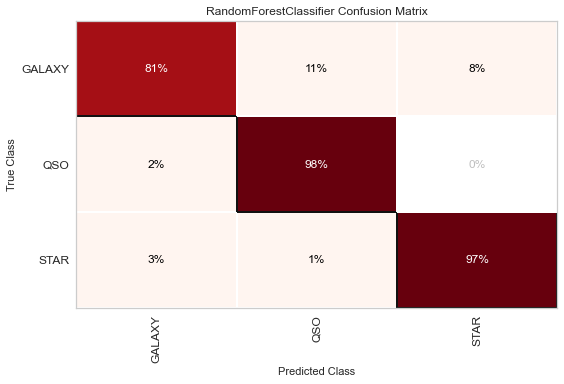

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [168]:
Classes = ['GALAXY','QSO','STAR']
viz = ConfusionMatrix(best_model_RF,classes=Classes,cmap="Reds",percent=True)
viz.score(X_test, y_test)
viz.show()

### 2.e/ Class Prediction Error

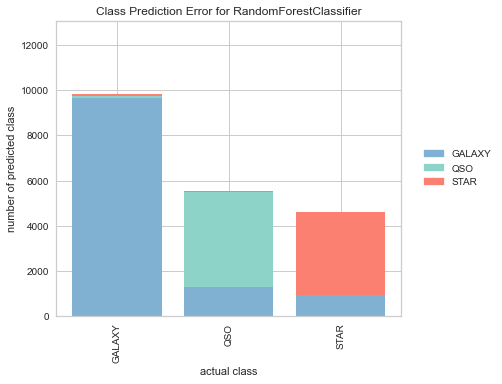

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [169]:
visualizer = ClassPredictionError(best_model_RF, classes=Classes)
set_palette('muted')

visualizer.fit(X_train_smote, y_train_smote)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Draw visualization

### 2.f/ ROC curves

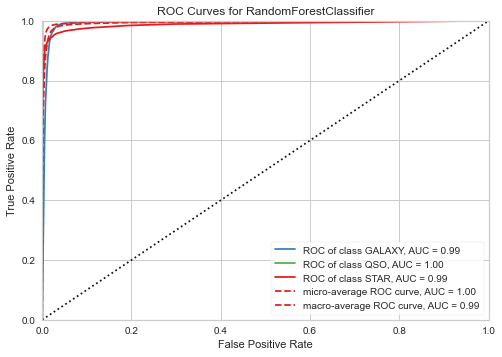

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [153]:
visualizer = ROCAUC(best_model_RF, classes=Classes)
set_palette('bold')

visualizer.fit(X_train_smote, y_train_smote)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

### 2.g/ importance plot

In [73]:
from sklearn.inspection import permutation_importance

In [155]:
# Calculate feature importances
importances = best_model_RF.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [list(df3.columns[1:-1])[i] for i in indices]

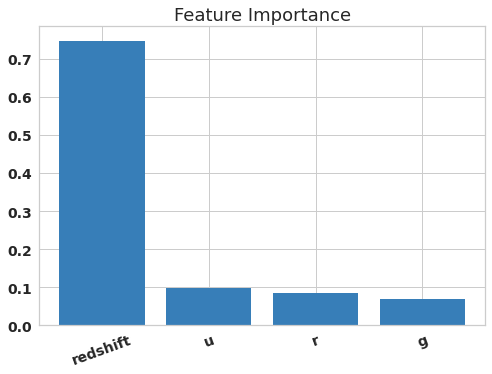

In [177]:
# Barplot: Add bars
plt.bar(range(X_train_smote.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X_train_smote.shape[1]), names, rotation=20, fontsize = 14)
plt.yticks(fontsize = 14)
# Create plot title
plt.title("Feature Importance",fontdict={'fontsize': 18})
# Show plot
plt.show()

In [181]:
X_train_smote[:,0].std()

0.9591289677410669

### 2.f/ Adding noise


In [259]:
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.fit_transform(X_test)


In [123]:
m=21
idx=0

store_score=np.zeros([m-1,1])
snr_vec=np.zeros([m-1,1])

for SNR in np.arange(1,m):

    # Calculate the power of the signal
    Ps_0=np.mean(X_train_smote[:,0]**2)
    Ps_1=np.mean(X_train_smote[:,1]**2)
    Ps_2=np.mean(X_train_smote[:,2]**2)
    Ps_3=np.mean(X_train_smote[:,3]**2)

    # Calculate the power of the noise
    Pn_0 = Ps_0 / SNR
    Pn_1 = Ps_1 / SNR
    Pn_2 = Ps_2 / SNR
    Pn_3 = Ps_3 / SNR

    # Calculate he standard deviation of the noise
    noise_std_0 = np.sqrt(Pn_0)
    noise_std_1 = np.sqrt(Pn_1)
    noise_std_2 = np.sqrt(Pn_2)
    noise_std_3 = np.sqrt(Pn_3)

    # generate the noise
    noise_0 = np.random.normal(0, noise_std_0, np.shape(X_train_smote)[0])
    noise_1 = np.random.normal(0, noise_std_1, np.shape(X_train_smote)[0])
    noise_2 = np.random.normal(0, noise_std_2, np.shape(X_train_smote)[0])
    noise_3 = np.random.normal(0, noise_std_3, np.shape(X_train_smote)[0])


    # Add noise to the training data

    X_train_smote_noise= X_train_smote.copy()
    X_train_smote_noise[:,0]+=noise_0
    X_train_smote_noise[:,1]+=noise_1
    X_train_smote_noise[:,2]+=noise_2
    X_train_smote_noise[:,3]+=noise_3


    # Add noise to the test data
    X_test_noise=X_test.copy()
    X_test_noise[:,0]+=np.random.normal(0, noise_std_0, np.shape(X_test_noise)[0])
    X_test_noise[:,1]+=np.random.normal(0, noise_std_1, np.shape(X_test_noise)[0])
    X_test_noise[:,2]+=np.random.normal(0, noise_std_2, np.shape(X_test_noise)[0])
    X_test_noise[:,3]+=np.random.normal(0, noise_std_3, np.shape(X_test_noise)[0])
    
    # Train our best RF model on the noisy data
    best_model_RF.fit(X_train_smote_noise, y_train_smote)
    
    y_pred= best_model_RF.predict(X_test_noise)
    score = best_model_RF.score(X_test_noise, y_test)
    RF_score_ = np.mean(score)
    
    
    snr_vec[idx]=SNR
    store_score[idx]= RF_score_
    idx+=1
    print('step =',idx,'/',m-1)
    


step = 1 / 20
step = 2 / 20
step = 3 / 20
step = 4 / 20
step = 5 / 20
step = 6 / 20
step = 7 / 20
step = 8 / 20
step = 9 / 20
step = 10 / 20
step = 11 / 20
step = 12 / 20
step = 13 / 20
step = 14 / 20
step = 15 / 20
step = 16 / 20
step = 17 / 20
step = 18 / 20
step = 19 / 20
step = 20 / 20


(array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

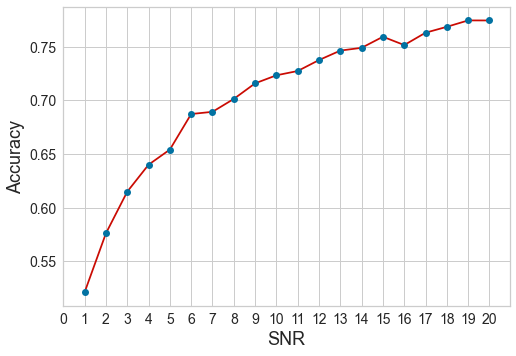

In [149]:
plt.plot(snr_vec,store_score,marker='o',markerfacecolor="b",color='r')
plt.xlabel('SNR',fontsize = 18)
plt.ylabel('Accuracy',fontsize = 18)
plt.xticks(range(21),fontsize = 14)
plt.yticks(fontsize = 14)

array([50, 60, 70, 80])